----

### <span style="color:#0b486b">SIT744 Practical Machine Learning for Data Science</span>


----

# # <span style="color:#0b486b">Assignment One: Mastering Machine Learning Process</span>
### <span style="color:#0b486b">Due: 11:59 pm 18 August 2019 (Sunday)</span>

#### <span style="color:red">Important note:</span> This is an **individual** assignment. It contributes **25%** to your final mark. Read the assignment instruction carefully.

This notebook has been prepared for you to complete Assignment 1. Some sections have been partially completed to help you get started. **The total marks for this notebook are 80 marks, which will be re-scaled to 25 marks in the grade.** 

* Before you start, read the entire notebook carefully once to understand what you need to do. <br><br>

* For each cell marked with **#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL**, there will be places where you **must** supply your own codes when instructed. <br><br>


## <span style="color:#0b486b">Instruction</span>

This assignment contains **three** parts, in increasing order of machine learning sophistication levels as we go through the process of building an effective machine learning solution.

* Part 1: Examine and understand your dataset **[10 points]**
* Part 2: Build Model Intuition: What Works and What doesn't **[57 points]**
* Part 3: Outlier/Anomaly Detection Survey: Write a Report to summarize at least 5 effective outlier/anomaly detection models and approaches published in recent 5 years **[13 points]**


**Hint**: this assignment was essentially designed based on the first three lectures and practical lab sessions. You are strongly recommended to go through these contents thoroughly which might help you complete this assignment.

## <span style="color:#0b486b">What to submit</span>

This assignment is to be completed individually and submitted to CloudDeakin. **By the due date, you are required to submit the following files to the corresponding Assignment in CloudDeakin**:

1.	<span style="color:red">**[YourID]\_assignment1\_solution.ipynb**</span>:  **this is your Python notebook solution source file**.
1.	<span style="color:red">**[YourID]\_assingment1\_output.html**</span>: **this is the output of your Python notebook solution *exported* in HTML format**.
1.	<span style="color:red">**[YourID]\_assingment1\_report.doc**</span>: **this is the report of your outlier detection survey work**.

For example, if your student ID is: 123456, you will then need to submit two files:
* 123456_assignment1_solution.ipynb
* 123456_assignment1_output.html
* 123456_assignment1_Report.doc

<span style="color:red">Now, please proceed to content below to complete your assignment!</span>

---

## <span style="color:#0b486b">Part 1: Examine and understand your dataset </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 10 points]**.<span></div>

This assignment shares a similar theme with the practical lab session in week 2. You are required to work with the NUS_WIDE data for the task of face recognition.

The first step in the process is to understand your data. You are given the following segments of codes
- to import necessary libraries, 
- to define a utility function to display face images from the dataset, and
- to load the dataset.

They are provided for you to get started. Please **do not** change the provided code as well the variables and function names as you will need them to complete subsequent tasks. 

---



**Note**: The following packages will be required for this assignment. If you need to import more packages, you might append them to the end of the cell.

In [0]:
from sklearn import datasets

import logging
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# append your own importing packages here if needed

In [0]:
# this function is a utility to display face images from the dataset
%matplotlib inline  

def display_faces(images, label, num2display):
    fig = plt.figure(figsize=(15,15))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(num2display):
        p = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        p.text(0, 14, str(label[i]))
        p.text(0, 60, str(i))

**Warning**: the following command will download the dataset (approx. 200 Mb) to your local computer. You may need to install the *Pillow* package first by running the following command in the Anaconda prompt.

conda install --channel conda-forge pillow

In [0]:
from sklearn.datasets import fetch_lfw_people
faces = datasets.fetch_lfw_people(min_faces_per_person=60, resize=0.4)

In [0]:
# store features in variable X and the label in variable y as in our usual convention notation.
X, y = faces.data, faces.target

---

You should realise that executing the above segment of codes will result in:
- variable `faces` containing the fetched dataset
- variables `X` and `y` which contain the features and the labels respectively.

We first examine the NUS_WIDE dataset. You are asked to supply your own codes in the following cells to answer the following questions.

####  <span style="color:red">**Question 1.1**</span>. Print out the description of the dataset using the variable `faces`. 
<div style="text-align: right"><span style="color:red">**[0.5 points]**</span></div>

In [5]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print(faces['DESCR'])

.. _labeled_faces_in_the_wild_dataset:

The Labeled Faces in the Wild face recognition dataset
------------------------------------------------------

This dataset is a collection of JPEG pictures of famous people collected
over the internet, all details are available on the official website:

    http://vis-www.cs.umass.edu/lfw/

Each picture is centered on a single face. The typical task is called
Face Verification: given a pair of two pictures, a binary classifier
must predict whether the two images are from the same person.

An alternative task, Face Recognition or Face Identification is:
given the picture of the face of an unknown person, identify the name
of the person by referring to a gallery of previously seen pictures of
identified persons.

Both Face Verification and Face Recognition are tasks that are typically
performed on the output of a model trained to perform Face Detection. The
most popular model for Face Detection is called Viola-Jones and is
implemented in the OpenC

####  <span style="color:red">**Question 1.2**</span>. Print out the total number of data points in this dataset.
<div style="text-align: right"><span style="color:red">**[1.5 points]**</span></div> 

In [6]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
print("Data point of data")
print(faces.data[:8,:])

print("Data point of images \n")
print(faces.images[:8,:])

print("Data point of target \n")
print(faces.target)

print("data point of target names \n")
print(faces.target_names)
# Student can use different field such as data, images target_names to get the number of data points 

Data point of data
[[139.33333   133.33333   122.        ...   1.6666666   1.6666666
    0.6666667]
 [ 66.333336   59.333332   86.        ... 250.        244.33333
  239.33333  ]
 [ 90.         90.333336   59.666668  ... 101.333336  151.66667
  232.       ]
 ...
 [ 12.         29.333334   74.        ... 230.66667   225.66667
  215.33333  ]
 [ 50.         78.         93.        ... 141.66667   142.66667
  141.66667  ]
 [ 84.         97.333336  128.        ... 118.333336  144.66667
  157.       ]]
Data point of images 

[[[139.33333    133.33333    122.         ...  69.          68.666664
    67.666664  ]
  [146.         133.         118.         ...  67.333336    67.666664
    67.        ]
  [147.66667    133.         124.         ...  66.333336    68.666664
    67.        ]
  ...
  [160.66667    120.          79.666664   ...   0.33333334   0.6666667
     0.6666667 ]
  [148.         179.33333    107.666664   ...   0.33333334   1.6666666
     1.6666666 ]
  [111.         197.         166.

####  <span style="color:red">**Question 1.3**</span>. Each class (or label) in this dataset corresponds to a public figure. Print out the number of classes, and the corresponding person name for each class. Print out 50 photos of *Ariel Sharon* and 50 photos of *Hugo Chavez*. You might decide to use the function `display_faces` provided at the beginning of this assignment, or you can write your own codes.
<div style="text-align: right"><span style="color:red">**[5 points]**</span></div> 

In [7]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# print out the number of classes, and the corresponding name of each class
class_ids=np.unique(y)

# [insert your code here]
p=[]
for i in faces.target_names:
  p.append(i)
  print("total number of classes")
  print(len(p))
  print("\n")
  print("classes and respective person names")

for i in range(len(class_ids)):
    # [insert your code here]
    print(class_ids[i], end=' ')
    print(p[i])

total number of classes
1


classes and respective person names
total number of classes
2


classes and respective person names
total number of classes
3


classes and respective person names
total number of classes
4


classes and respective person names
total number of classes
5


classes and respective person names
total number of classes
6


classes and respective person names
total number of classes
7


classes and respective person names
total number of classes
8


classes and respective person names
0 Ariel Sharon
1 Colin Powell
2 Donald Rumsfeld
3 George W Bush
4 Gerhard Schroeder
5 Hugo Chavez
6 Junichiro Koizumi
7 Tony Blair


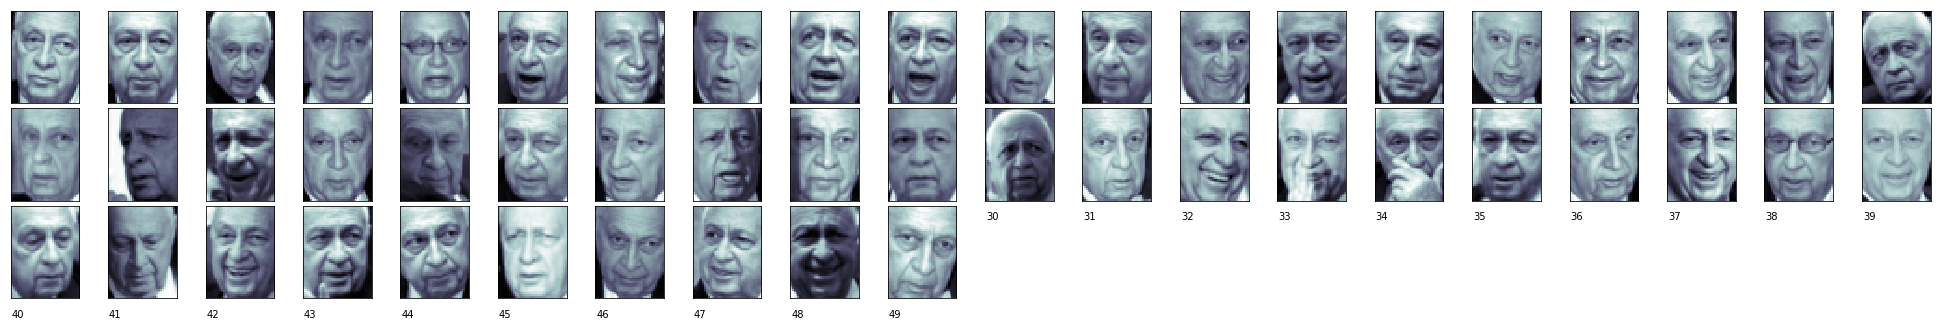

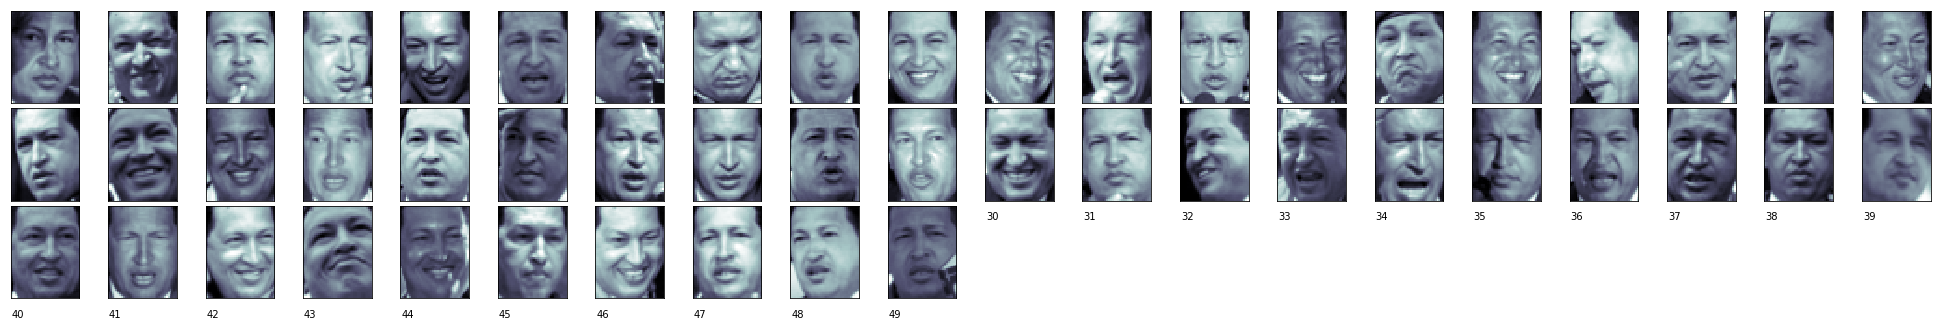

In [10]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

# Ariel sharon photos


a=[]
for i in range(0,len(faces.target)):
    if(faces.target[i]==0):
            a.append(faces.images[i])

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0.2, right=2, bottom=0.2, top=2, hspace=0.05, wspace=0.05)
for i in range(50):
    w = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
    w.imshow(a[i], cmap=plt.cm.bone)
        
    w.text(0, 60, str(i))

# Hugo Chavez photos

r=[]
for i in range(0,len(faces.target)):
    if(faces.target[i]==5):
            r.append(faces.images[i])

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(left=0.2, right=2, bottom=0.2, top=2, hspace=0.05, wspace=0.05)
for i in range(50):
    w = fig.add_subplot(20,20,i+1,xticks=[],yticks=[])
    w.imshow(r[i], cmap=plt.cm.bone)
        
    w.text(0, 60, str(i))
    
# print out 50 photos of Ariel Sharon and 50 photos of Hugo Chavez

####  <span style="color:red">**Question 1.4**</span>. Given our problem of interest is face recognition, should we choose supervised or unsupervised machine learning methods? Explain why and list at least four ML algorithms that are suitable for this problem.
<div style="text-align: right"><span style="color:red">**[1 point]**</span></div> 

##### Use this markdown cell to write your answer to this question.

[*Enter our answer here*]
 Face recognition is used to identify and verify the objects by their face. In Supervised learning we train the machine using label data which is laready tagged with the right answer. After the tagging process a new set of data is provided to the machine so that the supervised learning algorithm analyses the training data set and gives the right outcome from labelled data. 
 
 In unsupervised learning there no label available for the data.
 
 In the given dataset of face recognition there are labels. so, we use supervised learning.
 
 we can use four possible Machine learning algorithms for face recogition they are:
 
 1. linear regression
 2. SVM
 3. logistic regression
 4. K-nearest regression

####  <span style="color:red">**Question 1.5**</span>. create *a single train-split* with 20% of data for testing and the rest for training.
<div style="text-align: right"><span style="color:red">**[2 points]**</span></div> 

In [0]:
#YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import train_test_split

# split into a training and testing set
    # [insert your codes here]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=4)
                                                

---

### <span style="color:#0b486b">Part 2: Build Model  </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 70 points]**.<span></div>

After we have gained a good understanding of the dataset from the previous step, we should by now be clear of the following points:

- Do you have labels for this data? And hence, is it a supervised learning or unsupervised learning problem?
- Recall that machine learning prediction is about learning a function $y= f(x)$, where $y$ is your label. Python variables `X` and `y` have been constructed and stored for you.
- Variable `X` is a matrix, with each row is a vector $x_i$ assigned with label $y_i$. You should examine the data types (continuous, categorical, its dimensionality, etc.) of the features in `X` and the label in $y$. This will help you choose the right ML methods.

These are the most common questions. Depending on the answers, more refined questions and considerations may be required for an improved solution.

As a machine learning practitioner, it is rarely the case that you can come up with the best solution at the first attempt. It is an iterative process. With the experience building up over time, you will be more efficient at it. **The next step is to get your hand dirty, start to explore to see what work, what doesn't work**. This process usually starts with models that are simple or more familiar to you.

####  <span style="color:red">**Question 2.1**</span>. Use a *single split-train approach* and *Logistic Regression* as the classifier, you will examine what works and what doesn't work for your data:

The total marks for this question are <span style="color:red">**[34 points]**</span>, with the following detailed breakdown sub-questions:

<span style="color:red">**(a)**</span> **Write your code to use PCA for dimensionality reduction with 20 components to transform variable X to variable pca_X.**
<div style="text-align: right"> <span style="color:red">**[2 points]**</span> </div>

In [0]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
pca = decomposition.PCA(n_components=20)
pca_X = pca.fit_transform(X)


#### <span style="color:red">**(b)**</span> **Use the reduced dimension features pca_X obtained in previous steps to write your code to show the performance (recall, precision, accuracy, F-score) using *Logistic Regression* as the classifier and a single train-split with 40% of data will be used for testing and the rest for training.**
<div style="text-align: right"> <span style="color:red">**[4 points]**</span> </div>

In [18]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# [insert your codes here]
X_train, X_test, y_train, y_test = train_test_split(pca_X, y, test_size = 0.4, random_state=4)

log=LogisticRegression(penalty='l2', dual=False,\
              tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1,\
              class_weight=None, random_state=None, solver='liblinear', \
            max_iter=100, multi_class='ovr', verbose=0, warm_start=False, n_jobs=None)

train_model=log.fit(X_train,y_train)

y_pred = log.predict(X_test)

# Recall score
print("Recall value:",recall_score(y_test, y_pred, average='macro')*100,)

# Precision score
print("Precision value:",precision_score(y_test, y_pred, average='macro')*100,)

# Accuracy score
print("Accuracy value:",accuracy_score(y_test, y_pred)*100,)

# F-score value
print("F-score value:", f1_score(y_test, y_pred, average='macro')*100,)



Recall value: 44.585084832709974
Precision value: 54.10548941798942
Accuracy value: 60.55555555555555
F-score value: 46.16527914187129


<span style="color:red">**(c)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) *using Repeated Random Train-Split* (10 runs, each with 60/40 split for training and testing) on the original data. You *must* report both the mean and standard deviation of the performance for each evaluation metrics**.
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

In [19]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

# [insert your codes here]

pd = ShuffleSplit(n_splits=10, test_size=0.4, random_state=10)

# Recall value
recall=cross_val_score(log,pca_X,y,cv=pd, scoring='recall_macro')
print("Recall value:", recall.mean()*100, "(",recall.std()*100,)

# Precision value
precision=cross_val_score(log,pca_X,y,cv=pd, scoring='precision_macro')
print("Precision value:", precision.mean()*100, "(",precision.std()*100,)

# Accuracy value
accuracy=cross_val_score(log,pca_X,y,cv=pd, scoring='accuracy')
print("Accuracy value:", accuracy.mean()*100, "(",accuracy.std()*100,)

# F Score value
f1=cross_val_score(log,pca_X,y,cv=pd, scoring='f1_macro')
print("F-score value:", f1.mean()*100, "(",f1.std()*100,)

Recall value: 50.09296887542523 ( 1.422684431612107
Precision value: 57.529782275580324 ( 2.996152184108543
Accuracy value: 62.09259259259259 ( 1.8958658365594332
F-score value: 51.591420970959945 ( 1.7712684312009945


<span style="color:red">**(d)**</span> **Use the reduced dimension features pca_X obtained in step (a) to write your code to show the performance (recall, precision, accuracy, F-score) using *K-fold cross-validation with k=10 folds*.**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

In [20]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

from sklearn.model_selection import KFold

# [insert your codes here]
kfold=KFold(n_splits=10, random_state=None)

# Recall value
recall=cross_val_score(log,pca_X,y,cv=kfold, scoring='recall_macro')
print("Recall value:", recall.mean()*100, "(",recall.std()*100,)

# Precision value
precision=cross_val_score(log,pca_X,y,cv=kfold, scoring='precision_macro')
print("Precision value:", precision.mean()*100, "(",precision.std()*100,)

# Accuracy value
accuracy=cross_val_score(log,pca_X,y,cv=kfold, scoring='accuracy')
print("Accuracy value:", accuracy.mean()*100, "(",accuracy.std()*100,)

# F Score value
f1=cross_val_score(log,pca_X,y,cv=kfold, scoring='f1_macro')
print("F-score value:", f1.mean()*100, "(",f1.std()*100,)

Recall value: 49.26534268430618 ( 4.473109045489584
Precision value: 57.79986477265846 ( 5.720798103297347
Accuracy value: 61.65505804311774 ( 4.960357176132805
F-score value: 50.62584465019633 ( 4.585458015409932 %)


<span style="color:red">**(e)**</span> **Preparing a table to summarize the performances obtained from step (c) and (d) against recall, precision, accuracy and F-score from step (b). What conclusions can you draw from the comparison?**
<div style="text-align: right"> <span style="color:red">**[10 points]**</span> </div>

*Use this markdown cell to write your answer to this question.*


From B: 

Recall value: 45.12%

Precision Value: 54.40%

Accuracy Value: 60.74%

F-Score Value: 46.54%

From C: 

Recall value: 50.10% 

Precision Value: 57.71%

Accuracy Value: 62.07%

F-Score Value: 51.62%

From D: 

Recall value: 49.4% 

Precision Value: 58.02%

Accuracy Value: 61.72%

F-Score Value: 50.75%

From the above table we can see that K-fold and repeated random train-split methods which we have done in step C,D have given better performance values than step B. 

The better performance obtain from step C and step D is due to multiple train-split occurances then single train-split from step B
so it leads to better trained model which leads to provide better efficiency.

<span style="color:red">**Question 2.2.**</span> **Once you have built some intuition about the problem and the effectiveness of some modelling choices, if the initial results aren't too bad, you should start to gain some confidences in your approach. You are recommended to look at your results in the previous question again to convince yourselves of your results. Some questions you should starting asking are: Is your average prediction accuracy over 50%? over 70%? What else can you try to make it better? Is Linear SVM a good choice? Did the reduced dimension help improve the performance?**

**The next step is then to 'package' your code into some routine so that your investigation into your machine learning problem can be accelerated.**

The total marks for this question are <span style="color:red">**[23 points]**</span>, with the following detailed breakdown sub-questions:

**The following function is provided for you as an example of how one might 'package' the important steps so far into a single function to help accelerate your analyses**.

In [0]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

def ml_algorithm_screening_face(X,y,model, model_name, scoring_metrics, pca_dim, n_runs):
    estimators = []
    seed = 10
    if (pca_dim > 0):
        estimators.append(('pca', decomposition.PCA(n_components=pca_dim)))
    
    estimators.append((model_name,model))
    pipeline = Pipeline(estimators)
    kfold = KFold(n_splits=n_runs, random_state=seed)
    try:
        results = cross_val_score(pipeline, X, y, cv=kfold, scoring=scoring_metrics, verbose=1, n_jobs=-1)
    except ValueError:
        print("Opps! something went wrong!")
        
    return results

**Using  this function given above, you are asked to:**

<span style="color:red">**(a)**</span> **Write your code to call this function with the following specifications and print out the mean and standard deviation of the *accuracy* obtained.**
    - model: Linear SVM (using hinge loss)
    - PCA dimnesion = 20
    - the number of runs=10
    
<div style="text-align: right"> <span style="color:red">**[8 points]**</span> </div>

In [21]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL
svm_model = svm.LinearSVC(loss='hinge')
result=ml_algorithm_screening_face(X,y,svm_model,'svm','accuracy',20,10)
print("Accuracy:", result.mean()*100, "(",result.std()*100,)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuracy: 33.46158098396905 ( 5.985525619809854


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.9s finished


<span style="color:red">**(b)**</span>**Face recognition has a high-dimensional data problem typical  in modern machine learning. This explains why one might routinely use PCA to reduce its dimension.**

**Write your code to search for right dimension from a list of *dim = {10, 20,..,150}* using the same setting in question 2.2(a).**
- Print out the results for each dimension.
- Use box-plot to visualize the medium and the interquartile range of the accuracy for each dimension on the same figure, and 
- Report the dimension for PCA that gives the best result in term of accuracy.

<div style="text-align: right"> <span style="color:red">**[15 points]**<span> </div>

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    6.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 10 : 26.187396351575455 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   10.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 20 : 35.165837479270316 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   13.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 30 : 43.91487009397457 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   16.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 40 : 46.441680486456605 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 50 : 50.15035931453842 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   22.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 60 : 55.417357656163624 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   25.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 70 : 54.30790491984522 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   28.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 80 : 55.711442786069654 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 90 : 57.271420674405746 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   35.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 100 : 58.08789386401326 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   36.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 110 : 58.304588170259805 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   39.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 120 : 60.83360972913212 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   41.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 130 : 59.79878385848536 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   43.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Dimension 140 : 62.54394693200662 %


[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   47.5s finished


Dimension 150 : 65.13322277501382 %


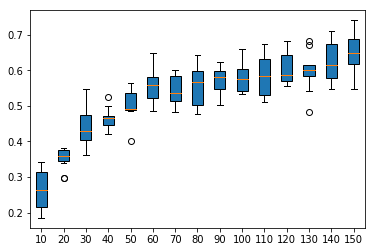

The Dimension for PCA which gives the best result is 150 with accuracy 65.13322277501382


In [23]:
# YOU ARE REQUIRED TO INSERT YOUR CODES IN THIS CELL

import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# [insert your code here]
ul=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150]

t=[]
box_fig=[]
for i in ul:
    result=ml_algorithm_screening_face(X,y,svm_model,'svm','accuracy',i,10)
    t.append(result.mean())
    box_fig.append(result)
    print("Dimension",i,":",result.mean()*100,"%")
    
plt.boxplot(box_fig,patch_artist=True,labels=[10,20,30,40,50,60,70,80,90,100,110,120,130,140,150])
plt.show()

print("The Dimension for PCA which gives the best result is",(t.index(max(t))+1)*10,"with accuracy", max(t)*100,)    


### <span style="color:#0b486b">Part 3: Outlier Detection Survey  </span>
<div style="text-align: right"><span style="color:red">**[Total mark for this part: 13 points]**.<span></div>

You are required to read at least 5 papers relating to outlier detection in the recent 5 years. It will help gain a good understanding how/when to use outlier detection models, how these models work in different datasets. The report needs to include the below points:
- Explain why you choose the five models with at least 0.5 A4 Page at the begining of the report; <span style="color:red">**[3 points]**.</span>
- For each model, you need to do <span style="color:red">**[2 points per model]**.</span>
    - at least 5 outlier detection models with the reference information where the model is published;
    - write 0.5 A4 Page for each model;
    - summarize the full strengths and weakness of each model by clearly presenting the evidence from the experiments declared in their original papers; 
    - Evaluation metrics and available datasets used for each model.

One example report looks like "On the Evaluation of Unsupervised Outlier Detection: Measures, Datasets, and an Empirical Study
by G. O. Campos, A. Zimek, J. Sander, R. J. G. B. Campello, B. Micenková, E. Schubert, I. Assent and M. E. Houle
Data Mining and Knowledge Discovery 30(4): 891-927, 2016, DOI: 10.1007/s10618-015-0444-8". https://link.springer.com/article/10.1007%2Fs10618-015-0444-8.

---
<div style="text-align: center">**END OF ASSIGNMENT ONE**</div>